In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

## Выделение гармонической части гамильтониана
$\frac{H}{E_J}=\frac{p^2}{2ME_J}+\frac{(\varphi-\varphi_{ex})^2}{2lq}+(1-\cos{\varphi})$

Считаем, что импульс в единицах $p_{old} = p_{new}\sqrt{ME_J}$, тогда 
$\frac{p_{old}^2}{2ME_J} = \frac{p_{new}^2}{2} =\frac{p^2}{2} $, а координата $\varphi_{old} = \varphi_{new}\sqrt{lq} = \varphi\sqrt{lq}$.

$\frac{H}{E_J}=\frac{p^2}{2}+\frac{\varphi^2}{2}-\frac{\varphi_{ex}\varphi}{\sqrt{lq}}+\frac{\varphi_{ex}^2}{2lq}+(1-\cos{\varphi\sqrt{lq}})$

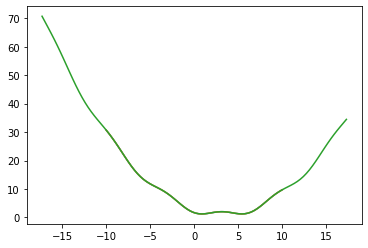

In [13]:
# phix - сдвиг по координате. перенормировка переменной будет влиять на пареметры phix?
def U(phi):
    return (phi - phix)**2/(2*lq) + 1 - np.cos(phi)

def U1(phi):
    return phi**2/2 - phi*phix/np.sqrt(lq) + phix**2/(2*lq) + 1 - np.cos(phi*np.sqrt(lq))

phix = np.pi
lq = 3
x = np.linspace(-10,10,100)
plt.plot(x, U(x))
plt.plot(x, U1(x/np.sqrt(lq))) #обратная замена переменных, новую выражаем через старую
plt.plot(x*np.sqrt(lq), U1(x)) #обратная замена переменных, новую выражаем через старую
plt.show()

## Переход к операторам рождения и уничтожения

$x_{new} = \frac{a+a^+}{\sqrt2}$

$\frac{H}{E_J} = N + (3/2+\frac{\varphi_{ex}^2}{2lq})E - \frac{\varphi_{ex}}{\sqrt{2lq}}(a+a^+) -\cos(\sqrt{\frac{lq}{2}}(a+a^+)
) $

In [14]:
S = 1000 #размерность матрицы   
#S_test = 10000
 
# параметры графика
width = 8
high = 6

In [15]:
def N(S):
    N = np.zeros((S,S))
    for i in range(1,S):
        N[i][i] = i
    return N

def a_crtn(S):
    a_crtn = np.zeros((S,S))
    for i in range(1,S):
        a_crtn[i-1][i] = np.sqrt(i)
    return a_crtn
    
def a_anh(S):
    a_anh = np.zeros((S,S))
    for i in range(1,S):
        a_anh[i][i-1] = np.sqrt(i)
    return a_anh
# используем в основном a_crtn + a_anh = a

def a(S):
    a = np.zeros((S,S))
    for i in range(1,S):
        a[i-1][i] = a[i][i-1] = np.sqrt(i)
    return a
H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - phix/np.sqrt(2*lq)*a(S)-np.cos(np.sqrt(lq/2)*a(S))
#H_test = N(S_test) + (3/2 + phix**2/(2*lq))*np.eye(S_test) - phix/np.sqrt(2*lq)*a(S_test)-np.cos(np.sqrt(lq/2)*a(S_test))
 

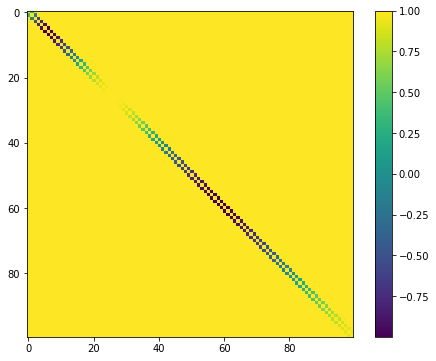

In [10]:
plt.figure(figsize=(width,high))
plt.imshow(np.cos(np.sqrt(lq/2)*a(S)))#, interpolation="bicubic")
plt.colorbar()
plt.show()

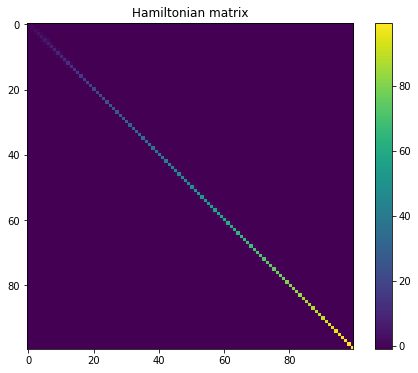

In [5]:
plt.figure(figsize=(width,high))
plt.imshow(H)#, interpolation="bicubic")
plt.title("Hamiltonian matrix")
plt.colorbar()
plt.show()

In [6]:
eigvals, eigvecs = np.linalg.eigh(H)

In [7]:
#eigvals_test, eigvecs_test = np.linalg.eigh(H_test)

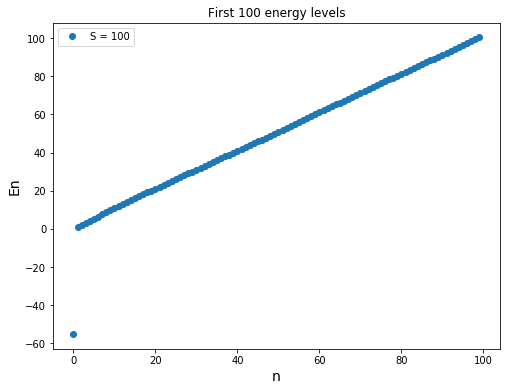

In [8]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], 'o',label="S = {}".format(S))
#plt.plot(eigvals_test[:en_plot_num], 'o',label="S_test = {}".format(S_test))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

In [9]:
en_plot_num = 250
plt.figure(figsize=(width,high))
plt.plot(np.abs(eigvals[1:en_plot_num]-eigvals_test[1:en_plot_num]), 'o',label="S = {}".format(S))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.title("Absolute energy difference for first {} energy levels".format(en_plot_num))
plt.show()

NameError: name 'eigvals_test' is not defined

<Figure size 576x432 with 0 Axes>

Использования операторов рождения и уничтожения не дало существенного улучшения сходимости по энергии (абсолютная разность текущего и тестового значений еще хуже, чем в координатном представлении), но зато ускорился подсчет собственных значений. 

In [ ]:
n_curr = 300
plt.figure(figsize=(width,high))
plt.plot(eigvecs[250:350, n_curr], label="S = {}".format(S))
plt.plot(eigvecs_test[250:350, n_curr], label="S = {}".format(S))
#plt.plot(eigvecs[:, n_curr]**2)
plt.xlabel("n",size=14)
plt.ylabel("psi_n",size=14)
plt.title("{}th wavefunction".format(n_curr))
plt.show()

In [ ]:
# уровень отсечения возьмем как и прошлом случае. Хотя неясно что делать с нулевым ззначением энергии.
N_trunc = 170

In [ ]:
e_en = 0.05 # точности по энергии
E_trunc = eigvals[N_trunc]
E_trunc_test = eigvals_test[N_trunc]
en_diff = abs(E_trunc-E_trunc_test)
if en_diff < e_en:
    print('Разность энергий {} несущественна. Выбранное количество точек разбиения можно считать оптимальным'
          .format(en_diff))
else:
    print('Разность энергий {} чувствительна к изменению количества точек. Увеличь плотность точек на интервале'
          .format(en_diff))

In [ ]:
# построение psi(N_trunc)**2
# область постоения образана до первых 200 знчений 
num = N_trunc
plt.figure(figsize=(width, high))
plt.plot(eigvecs[:200,num]**2,label="Current line {} ".format(num)) 
plt.plot(eigvecs_test[:200,num]**2,label="Test line {} ".format(num))
plt.xlabel('n', size=14)
plt.ylabel('$\psi^2$(x)',size=14)
plt.legend()
plt.title('last satisfactory squred wavefunction',size=14)
plt.show() 

In [ ]:
# построение psi_(0)^2
# область не обрезана
num = 0
plt.figure(figsize=(width, high))
plt.plot(eigvecs[:,num]**2,label="Current line {} ".format(num)) 
plt.plot(eigvecs_test[:,num]**2,label="Test line {} ".format(num))
plt.xlabel('n', size=14)
plt.ylabel('$\psi^2$(x)',size=14)
plt.legend()
plt.title('Zeroth squred wavefunction',size=14)
plt.show()    

# ?????????????????????????????????????????????????????????????????

In [ ]:
# Волновые функции сравниваются на интервале, где они обе определены. 
# В рамках данной задачи удобно выбрать S первых значений
eps = np.max(np.abs(eigvecs[:S, N_trunc]**2-eigvecs_test[:S,N_trunc]**2))
eps1 = np.max(np.abs(eigvecs[:S, 0]**2-eigvecs_test[:S, 0 ]**2))
print("Максимальное отличие плотностей вероятности на интервале {} при n = N_trunc: {}".format(S, eps))
print("При n = 0: {}".format(eps1))

## К уравнению Паули

In [ ]:
n_init = 23 # начальный уровень
rho_init = np.zeros([N_trunc])
rho_init[n_init] = 1
plt.figure(figsize=(width,high))
plt.plot(rho_init)       
plt.title("Diagonal Density Matrix Elements")
plt.show()
 

## Матрицы скоростей затухания
### $W_{mn}=\frac{2\pi}{\hbar^{2}}\left|<n|\hat{x}|m>\right|^2g(\omega_{m,n})k^2(\omega_{m,n})$
 
From Blum:

### $\frac{W_{mn}}{W_{nm}} = \frac{exp(-\beta E_m)}{exp(-\beta E_n)} \rightarrow W_{mn} = W_{nm}*exp(-\beta(E_m - E_n))$

$\left|<n|\hat{x}|m>\right|^2 = lq/2\left|<n|a+a^+|m>\right|^2 =lq\left|<n|m-1>+<n|m+1>\right|^2 $

In [ ]:
gamma = 1 
const = gamma*np.pi*lq

def squred_abs(n, m): 
    n_ket = eigvecs[n]
    m_bra = eigvecs[m] 
    integ = sum(eigvecs[:,n]*eigvecs[:,m-1])+sum(eigvecs[:,n]*eigvecs[:,m+1])
    return np.abs(integ)**2
#print(squred_abs(1, 2, x))

################################################
# Заполнение матриц W
################################################
W = np.zeros([N_trunc, N_trunc])
for i in range(N_trunc):
    for j in range(N_trunc):
        if i<j: 
            W[i][j] = const*squred_abs(i, j)

In [ ]:
plt.figure(figsize=(width,high))
plt.imshow(W, interpolation="bicubic")
plt.title("Transition matrix")
plt.colorbar()
plt.show()

In [ ]:
def Wm(W): #функция выдает вектор
    w = []
    for m in range(N_trunc):
        s = 0
        for n in range(N_trunc):
            s += W[n][m]
        w.append(s)
    return w

lis = np.array(Wm(W))
#lis_test = np.array(Wm(W_test))

plt.figure(figsize=(width, high))
plt.title('Vector W[m]')
plt.plot(lis, label = 'W')     
#plt.plot(lis_test, label = 'W_test')
plt.legend()
plt.show()

### Уравнение Паули
$\dot{\rho}(t)_{mm} = \sum_{n \neq m}{\rho(t)_{nn}W_{mn}} - \rho(t)_{mm}\sum_{n \neq m}{W_{nm}}$

### Метод Рунге-Кутты IVго порядка

$\frac{d\rho}{dt}=f(t, \rho(t))$

$\rho(t_0)=\rho_0$

$\rho_{i+1} = \rho_{i}+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$

$k_1 = f(t_i, \rho_i)$

$k_2 = f(t_i+\frac{h}{2}, \rho_i+\frac{h}{2}k_1)$

$k_3 = f(t_i+\frac{h}{2}, \rho_i+\frac{h}{2}k_2)$

$k_4 = f(t_i+h, \rho_i+hk_3)$, $i = 0, ..., n-1$.

Примечание: в рассматриваемом случае функция $f(\rho(t))$, но не зависит от времени явно. 
 

In [ ]:
dt = 0.05
L = 5  
nt = int(L/dt)
iplot = 20
save_all = []
print("Количество итераций по времени: {}".format(nt))

def pauli_vec_func(rho, W):  # принимает на вход распределение и W, на выходе  
    res = []
    for m in range(N_trunc):
        plus = 0
        minus = 0
        for n in range(N_trunc):
            plus += rho[n]*W[m][n]
            minus += W[n][m]
        minus = minus*rho[m]
        res.append(plus - minus)
    return np.array(res)
rho_curr = rho_init
rho_new = np.zeros([N_trunc])
#for t in tqdm(range(nt+1)):
for t in range(nt+1):
    k1 = pauli_vec_func(rho_curr, W)
    k2 = pauli_vec_func(rho_curr + (dt/2)*k1, W)
    k3 = pauli_vec_func(rho_curr + (dt/2)*k2, W)
    k4 = pauli_vec_func(rho_curr + dt*k3, W)
    rho_new = rho_curr + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    save_all.append(rho_new)
    #if not t % iplot:                    
        # Display Solution
        # -------------------------------------- 
     #   plt.plot(rho_new) #, interpolation="bicubic", cmap=plt.cm.RdBu) 
     #   plt.title("T = {}".format(t*dt))
     #   plt.gcf().canvas.draw()
    
    rho_curr = rho_new
    

In [ ]:
n_plot = 50 
plt.figure(figsize=(width, high))
plt.title('Plotting {}th step of {}'.format(n_plot, nt))
plt.plot(save_all[n_plot])       
plt.show() 

In [ ]:
plt.figure(figsize=(width, high))
plt.plot(rho_new)       
plt.title('Resulted density')
plt.show() 

In [ ]:
# check of normalazing
e = 0.000000001
z = np.sum(rho_new)
if (abs(1-z)<e):
    print("Норма сохраняется")
else:
    print("Ошибка: норма не сохраняется")

In [ ]:
plt.figure(figsize=(width, high))
plt.plot(pauli_vec_func(rho_new, W))       
plt.title('Подстановка в правую часть результирующей матрицы')
plt.show() 

## Случай гармонического осциллятора
H_ho = N + 1/2

In [ ]:
H_ho = N(S) + 0.5*np.eye(S)
eigvals_ho, eigvecs_ho = np.linalg.eigh(H_ho)

In [ ]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals_ho[:en_plot_num],"o", label="S = {}".format(S))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

In [ ]:
n_curr = 599
plt.figure(figsize=(width,high))
plt.plot(eigvecs_ho[:, n_curr], label="S = {}".format(S))
#plt.plot(eigvecs[:, n_curr]**2)
plt.xlabel("n",size=14)
plt.ylabel("psi_n",size=14)
plt.title("{}th wavefunction".format(n_curr))
plt.show()

## Гармонический осциллятор, но с дбавлением косинуса
$H_{hoo} = N + 1/2 - cos(\sqrt{\frac{lq}{2}}(a+a^+)$

In [ ]:
H_hoo = N(S) + 0.5*np.eye(S) - np.cos(np.sqrt(lq/2)*a(S))
eigvals_hoo, eigvecs_hoo = np.linalg.eigh(H_hoo)

In [ ]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals_hoo[:en_plot_num],"o", label="S = {}".format(S))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()